## EDA - Visualizations

In [62]:
# data manipulation
import pandas as pd
import numpy as np
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#preprocessing data is neccesary
#there are missing values in age and embarked features
#Cabin feature will be removed
#Encoder feature of type object
#select feature for EDA: Survived,Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Anaylisis Univariable

In [6]:
### Analysis univariable
## Numeric variables: Using histograms
def plot_histogram(columns, dataframe):
    # larger figure size for subplots
    plt.figure(figsize = [20, 10])
    # add subplots 
    for n in range(len(columns)):
        #bins = np.arange(min(df[columns[n]]), max(df[columns[n]]) + 1, 1)
        plt.subplot(2, 2, n + 1)
        plt.hist(data = df, x = columns[n])
        plt.xlabel(columns[n])

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


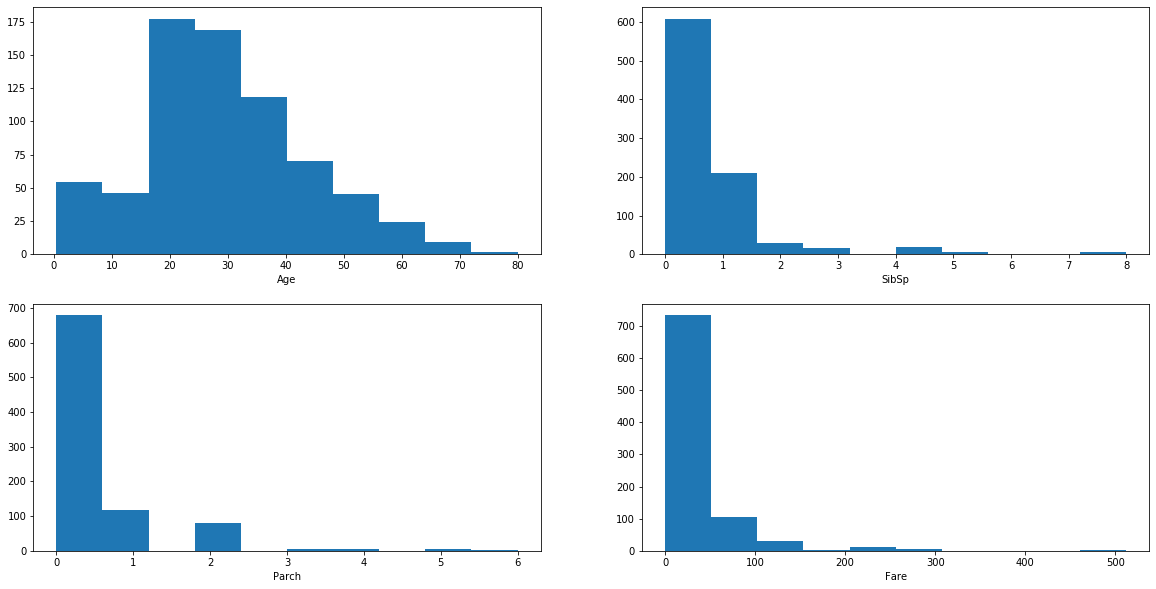

In [7]:
# plot every numeric variables
plot_histogram(['Age', 'SibSp', 'Parch', 'Fare'], df)

In [8]:
#Conclusions:
#most age's people range from 20 to 40 
#most passengers didn't have sibling or spouse aboard
#most passengers didn't have parents or children aboard
#most passengers' fare range from 0 to 50~100

In [9]:
## Categorical variables: Using bar chart
def plot_bar(columns, dataframe):
    # larger figure size for subplots
    plt.figure(figsize = [20, 10])
    # add subplots 
    for n in range(len(columns)):
        plt.subplot(2, 3, n + 1)
        sns.countplot(data = df, x = columns[n])
        plt.xlabel(columns[n])

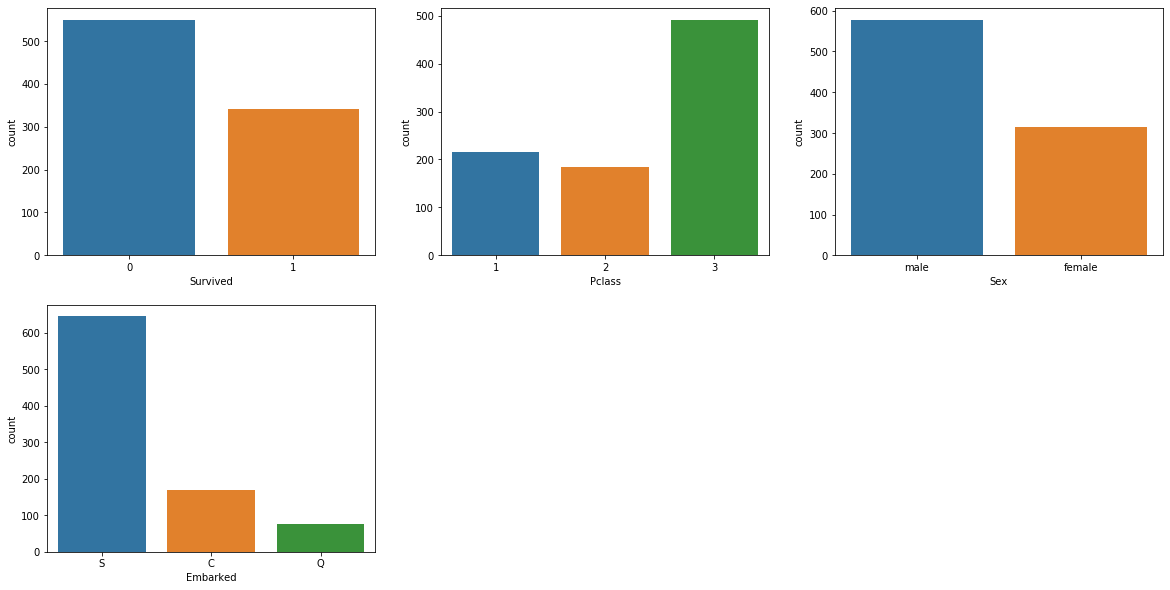

In [10]:
# plot every numeric variables
plot_bar(['Survived', 'Pclass', 'Sex', 'Embarked'], df)

In [11]:
#Conclusions:
#there are more deaths than survivors
#there are more people of class 3 
#there are more man than woman
#most people embarked in Southampton(S)

### Anaylisis Multivariable

In [12]:
def plot_bar_hue(x, hue, df):
    plt.figure(figsize = [15, 5])
    # add subplots
    for n in range(len(hue)):
        plt.subplot(1, 3, n + 1)
        sns.countplot(data = df, x = x, hue = hue[n])

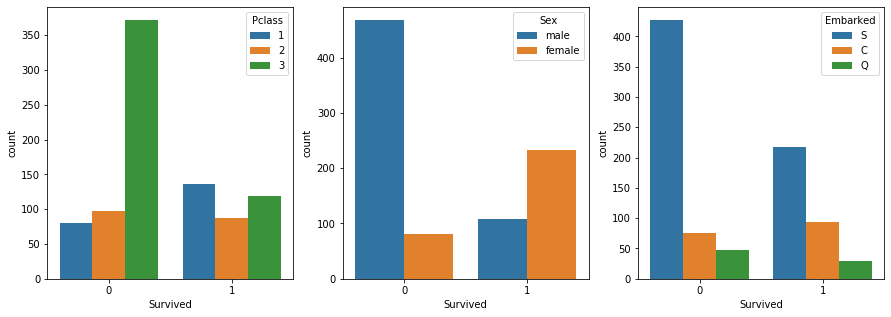

In [13]:
#relation between target and categorical features
plot_bar_hue('Survived', ['Pclass', 'Sex', 'Embarked'], df = df)

In [14]:
#Conlusions
######According 1 picture##########
#most of deaths were of class 3
#almost the half of class 2  dead
#the most of class 1 survived
######According 2 picture##########
#most of the dead were men
#the most of women survived
#the most of deaths embarked in Southampton

In [15]:
def plot_hist_two_variables(y, features, df):
    #add subplots
    for n in range(len(features)):
        fx, ax = plt.subplots(1, 1,figsize = (8, 5))
        plt.hist(data = df[df[y] == 0], x = features[n], alpha = .5, label = 'Not survived')
        plt.hist(data = df[df[y] == 1], x = features[n], alpha = .5, label = 'Survived')
        plt.xlabel(features[n])
        plt.ylabel(y)
        plt.legend()

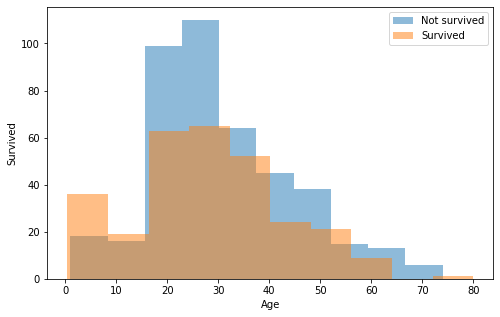

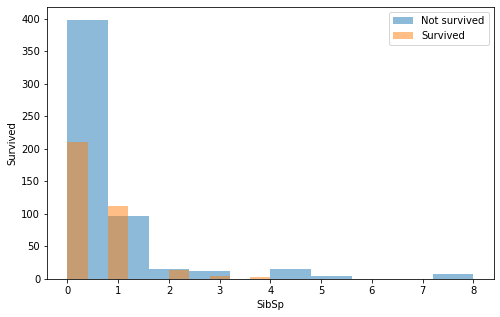

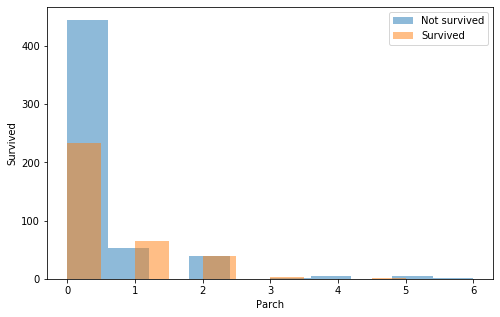

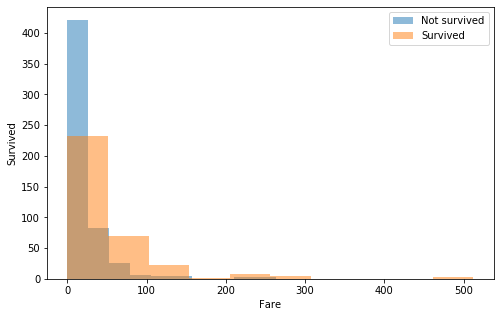

In [16]:
#relation between target and categorical features
plot_hist_two_variables('Survived', ['Age', 'SibSp', 'Parch', 'Fare'], df = df)
#the most survived were 0~40
#there are more survived in the range from 0~10 
#there are not significant relation with SibSp and Survived

In [30]:
# see correlation
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Preprocessing step

In [17]:
# features to predict: 
# Fare, Age, Pclass, Sex, Parch

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
# change sex type to numeric using LabelEncoder o manually
le = LabelEncoder()
le.fit(df['Sex'].drop_duplicates())
df['Sex'] = le.transform(df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [42]:
# Age has null values
# replace age null to mean
df['Age'] = df['Age'].replace(np.nan, df['Age'].mean())
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# split training and testing data
# features to predict: 
# Fare, Age, Pclass, Sex, Parch
X = df[['Fare', 'Age', 'Pclass', 'Sex', 'Parch']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [63]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
print('accuracy training: {}'.format(lr.score(X_train, y_train)))
print('accuracy testing: {}'.format(lr.score(X_test, y_test)))

accuracy training: 0.7993579454253612
accuracy training: 0.7993579454253612
